In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

In [2]:
# path = 'C:\\Users\\sarfi\\Desktop\\second_ellipse.003_20204321_343_5.analysis.csv'
path = '/home/ikharitonov/Desktop/sleap_training/second_ellipse.003_20204321_343_5.analysis.csv'
df = pd.read_csv(path)
df

,track,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
0,NaN,0,NaN,30.098503,183.755737,NaN,135.012780,156.221634,NaN,269.288632,...,NaN,100.120031,188.017810,NaN,168.908319,123.859011,NaN,165.710764,189.323207,NaN
1,NaN,1,10.299853,29.928240,183.859467,0.906243,135.843323,156.039566,0.940850,270.218414,...,0.927483,101.874626,188.069046,0.924287,169.743134,124.028069,0.940773,167.756516,189.751663,0.902475
2,NaN,2,10.309512,29.864458,182.192261,0.885018,134.164429,156.009537,0.945554,271.867157,...,0.947799,100.180702,188.222885,0.960958,169.816925,123.965485,0.933206,167.715759,189.825195,0.883926
3,NaN,3,10.257852,29.822008,182.182114,0.881487,134.090759,156.008041,0.948546,271.752930,...,0.945182,100.114777,188.138855,0.955913,169.757278,123.968246,0.908748,168.040726,188.063324,0.953332
4,NaN,4,10.400537,29.853571,182.212814,0.875701,134.118958,155.955917,0.959233,271.813385,...,0.955354,100.022308,187.938156,0.971927,169.851013,123.924416,0.951482,168.148407,188.126663,0.892221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27838,NaN,27858,10.211238,32.080292,183.936462,0.913815,138.144318,162.170609,0.930936,272.095764,...,0.963983,128.212296,171.903412,0.841206,148.302811,152.153030,1.036520,148.014328,172.209427,0.954158
27839,NaN,27859,10.174915,32.060841,183.755219,0.903187,138.091232,162.178085,0.929457,272.132812,...,0.962262,128.228607,171.874573,0.835356,148.203110,152.207077,1.039286,147.910248,172.177383,0.967416
27840,NaN,27860,10.154961,32.028248,183.805023,0.925700,138.192947,162.201752,0.929702,272.211884,...,0.968969,128.317841,171.919479,0.839643,148.304581,152.245300,1.021459,148.010880,172.214355,0.975907
27841,NaN,27861,10.093005,32.011517,183.807724,0.943651,138.201584,162.166412,0.923574,272.136932,...,0.972047,129.711578,171.901993,0.842626,149.787750,152.162689,1.029769,148.099594,172.169250,0.962196


In [3]:
df.columns

Index(['track', 'frame_idx', 'instance.score', 'left.x', 'left.y',
       'left.score', 'center.x', 'center.y', 'center.score', 'right.x',
       'right.y', 'right.score', 'p1.x', 'p1.y', 'p1.score', 'p5.x', 'p5.y',
       'p5.score', 'p3.x', 'p3.y', 'p3.score', 'p7.x', 'p7.y', 'p7.score',
       'p2.x', 'p2.y', 'p2.score', 'p8.x', 'p8.y', 'p8.score', 'p4.x', 'p4.y',
       'p4.score', 'p6.x', 'p6.y', 'p6.score'],
      dtype='object')

In [4]:
columns_of_interest = ['left.x','left.y','center.x','center.y','right.x','right.y','p1.x','p1.y','p2.x','p2.y','p3.x','p3.y','p4.x','p4.y','p5.x','p5.y','p6.x','p6.y','p7.x','p7.y','p8.x','p8.y']
active_points = ['center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
active_points_x = ['center.x','p1.x','p2.x','p3.x','p4.x','p5.x','p6.x','p7.x','p8.x']
active_points_y = ['center.y','p1.y','p2.y','p3.y','p4.y','p5.y','p6.y','p7.y','p8.y']

## Processing data

In [5]:
coordinates_dict = {key:df[key].to_numpy() for key in columns_of_interest}

In [6]:
displacements_dict = {k:np.diff(v) for k, v in coordinates_dict.items()} # in [displacement] = [pixels / frame]

In [7]:
displacements_dict

{'left.x': array([-0.17026329, -0.06378174, -0.04244995, ..., -0.03259277,
        -0.01673126, -0.01097488]),
 'left.y': array([ 0.10372925, -1.66720581, -0.01014709, ...,  0.04980469,
         0.00270081, -0.03517151]),
 'center.x': array([ 0.83054293, -1.67889404, -0.07366943, ...,  0.10171509,
         0.00863647,  0.01040649]),
 'center.y': array([-0.18206766, -0.0300293 , -0.00149536, ...,  0.02366638,
        -0.03533936,  0.02444458]),
 'right.x': array([ 0.9297827 ,  1.64874268, -0.11422729, ...,  0.07907104,
        -0.07495117,  0.02716064]),
 'right.y': array([ 0.1524123 ,  0.13650513, -0.08070374, ...,  0.08476257,
         0.00149536,  0.10340881]),
 'p1.x': array([-0.10958221, -0.1585083 , -0.10050964, ...,  0.07823944,
        -0.06075287,  0.02996826]),
 'p1.y': array([-0.08263065,  1.76931763, -0.18502808, ...,  0.02200317,
        -0.02868652,  0.01107788]),
 'p2.x': array([-0.60518889, -0.0932312 , -1.57774353, ...,  0.09025574,
        -0.05848694,  0.06071472]),
 

In [8]:
# Calculating mean displacement between left and right reference points (horizontal and vertical components separately)
mean_reference_x = np.stack((displacements_dict['left.x'], displacements_dict['right.x'])).mean(axis=0)
mean_reference_y = np.stack((displacements_dict['left.y'], displacements_dict['right.y'])).mean(axis=0)
mean_reference_x.shape

(27842,)

In [9]:
# Subtracting the displacement of the reference points at each frame
reference_subtraced_displacements_dict = {k:displacements_dict[k]-mean_reference_x for k in active_points_x} | {k:displacements_dict[k]-mean_reference_y for k in active_points_y} # joining the horizontal and vertical dictionaries into one

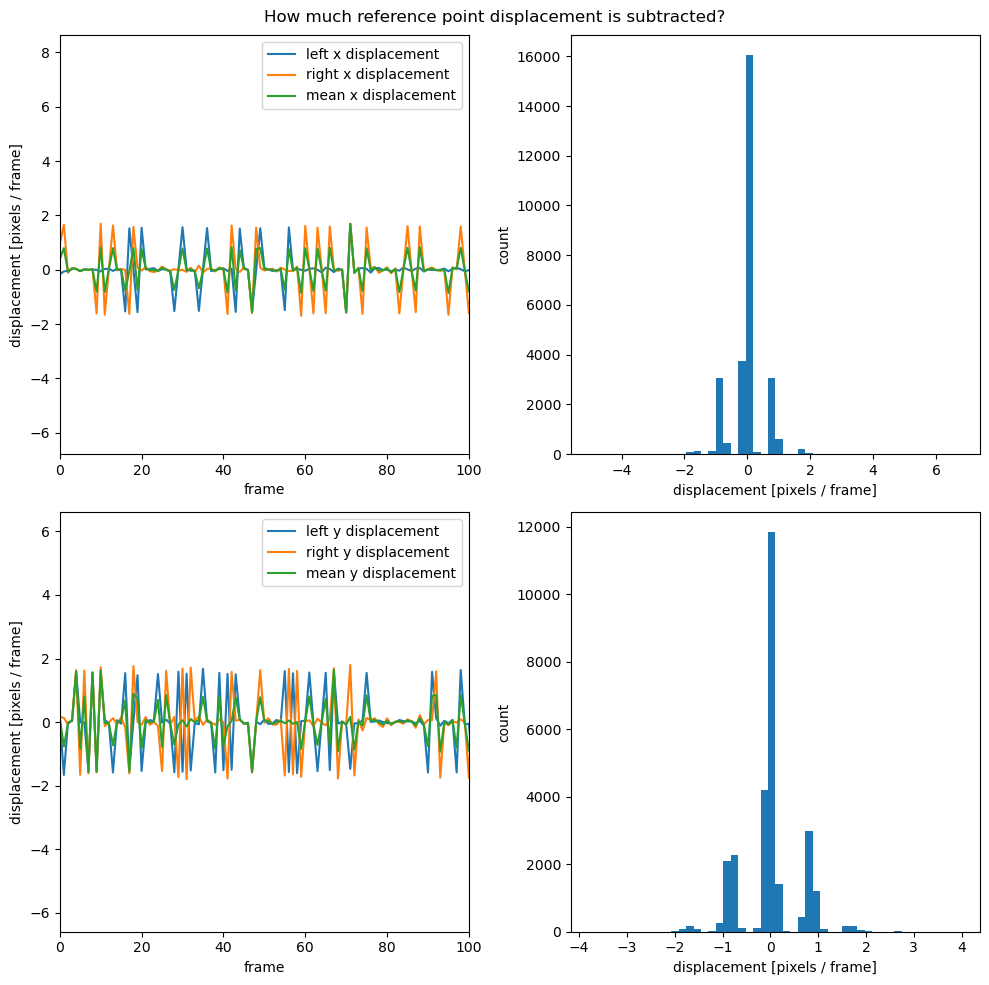

In [10]:
# Info plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('How much reference point displacement is subtracted?')

ax[0][0].plot(displacements_dict['left.x'])
ax[0][0].plot(displacements_dict['right.x'])
ax[0][0].plot(mean_reference_x)
ax[0][0].set_xlim([0,100])
ax[0][0].legend(['left x displacement', 'right x displacement', 'mean x displacement'])
ax[0][0].set_xlabel('frame')
ax[0][0].set_ylabel('displacement [pixels / frame]')

ax[0][1].hist(mean_reference_x, bins=50)
ax[0][1].set_xlabel('displacement [pixels / frame]')
ax[0][1].set_ylabel('count')



ax[1][0].plot(displacements_dict['left.y'])
ax[1][0].plot(displacements_dict['right.y'])
ax[1][0].plot(mean_reference_y)
ax[1][0].set_xlim([0,100])
ax[1][0].legend(['left y displacement', 'right y displacement', 'mean y displacement'])
ax[1][0].set_xlabel('frame')
ax[1][0].set_ylabel('displacement [pixels / frame]')

ax[1][1].hist(mean_reference_y, bins=50)
ax[1][1].set_xlabel('displacement [pixels / frame]')
ax[1][1].set_ylabel('count')

plt.tight_layout()
plt.show()

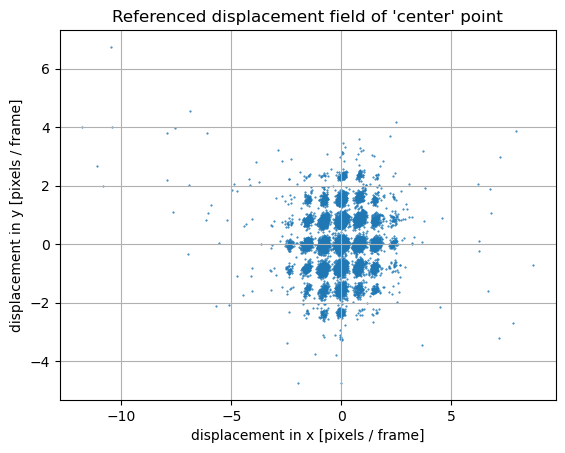

In [11]:
point = 'center'
plt.figure()
plt.title(f"Referenced displacement field of '{point}' point")
plt.scatter(reference_subtraced_displacements_dict[f'{point}.x'], reference_subtraced_displacements_dict[f'{point}.y'], s=0.25)
plt.xlabel('displacement in x [pixels / frame]')
plt.ylabel('displacement in y [pixels / frame]')
plt.grid()
plt.show()

In [12]:
def recalculated_coordinates(point_name):
    # Recalculates coordinates of a point at each frame, applying the referenced displacements to the coordinates of the very first frame.
    out_array = np.zeros(reference_subtraced_displacements_dict[point_name].shape[0]+1)
    out_array[0] = df[point_name].to_numpy()[0]
    for i, disp in enumerate(reference_subtraced_displacements_dict[point_name]):
        out_array[i+1] = out_array[i] + disp
        
    return out_array

reference_subtraced_coordinates_dict = {p:recalculated_coordinates(p) for p in active_points_x + active_points_y}

In [13]:
reference_subtraced_coordinates_dict

{'center.x': array([135.01277982, 135.46356305, 132.99218854, ..., 135.76644906,
        135.82092675, 135.82324036]),
 'p1.x': array([ 90.10112884,  89.61178693,  88.66079816, ..., 123.71067055,
        123.6957589 , 123.71763428]),
 'p2.x': array([102.48558288, 101.50063428, 100.61492261, ..., 127.63806161,
        127.62541588, 127.67803773]),
 'p3.x': array([134.73557834, 133.82324322, 133.03120526, ..., 135.82101449,
        135.88283166, 135.91346558]),
 'p4.x': array([168.90831856, 169.36337384, 168.64468487, ..., 145.87808236,
        147.40709313, 147.41015443]),
 'p5.x': array([180.69359622, 181.41317853, 180.74270734, ..., 149.740738  ,
        149.83917626, 149.82211121]),
 'p6.x': array([165.71076412, 167.3767558 , 166.5435191 , ..., 145.58438119,
        145.718937  , 145.62995728]),
 'p7.x': array([134.68638843, 135.53137311, 132.89761456, ..., 135.54547127,
        135.71136864, 135.58149537]),
 'p8.x': array([100.12003138, 101.49486645,  99.00846204, ..., 125.89134225,

## Plotting

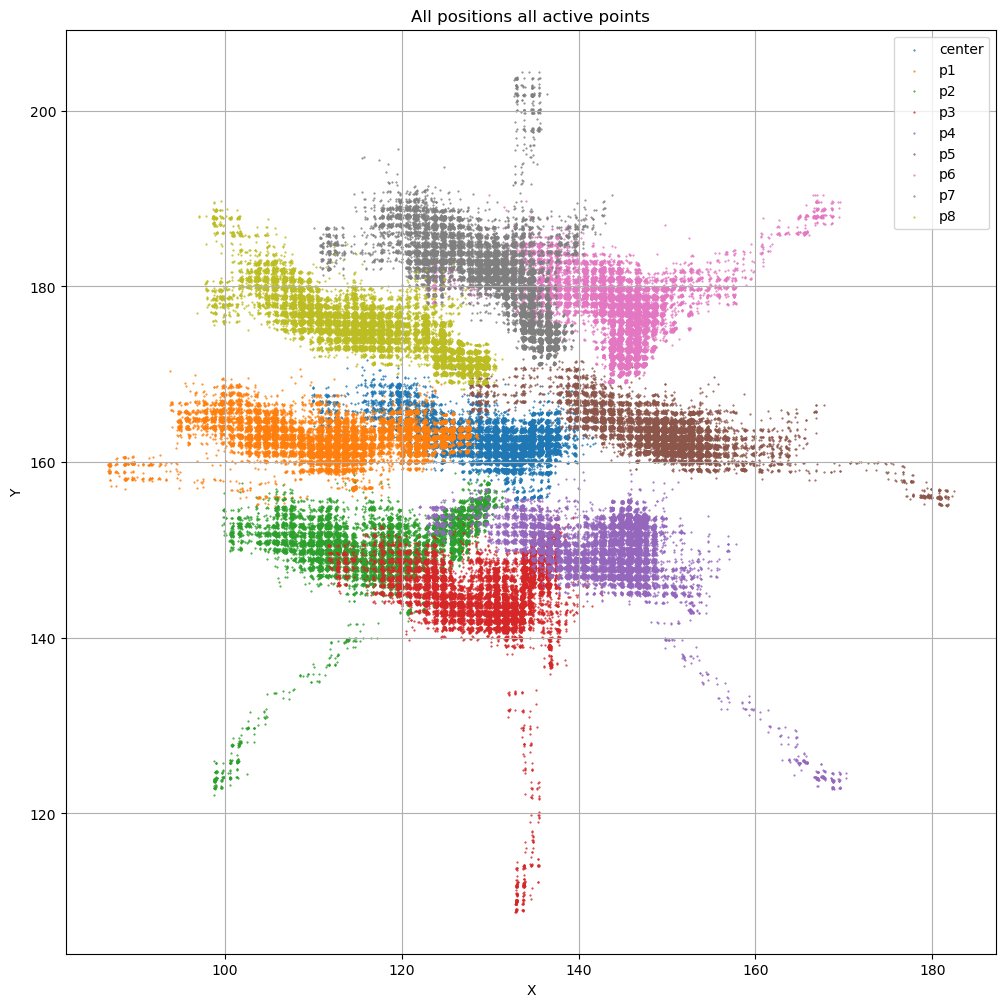

In [14]:
plt.figure(figsize=(12,12))
plt.title("All positions all active points")
for point in active_points:
    plt.scatter(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], s=0.25)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(active_points)
plt.grid()
plt.show()

In [15]:
# %matplotlib notebook

# def update_annot(ind,event):
#     annot.xy = (x[ind], y[ind])
#     text = f'hello world {ind}'
#     annot.set_text(text)
#     annot.get_bbox_patch().set_alpha(0.6)

# def on_pick(event):
#     print(event)
#     ind = int(event.ind)
#     print(f"Index of picked point: {ind}")
#     vis = annot.get_visible()
#     update_annot(ind,event)
#     annot.set_visible(True)
#     fig.canvas.draw_idle()
# #     time.sleep(5)
# #     annot.set_visible(False)
# #     fig.canvas.draw_idle()

# # Defining data normalisation and colormap
# # norm = matplotlib.colors.Normalize(vmin=min(self.proj_metric), vmax=max(self.proj_metric))
# # cmap = matplotlib.cm.get_cmap('viridis')

# fig,ax = plt.subplots(figsize=(10,10))

# # plt.title(f'{self.parameters["projection_type"]} {self.parameters["area"]} hem={self.parameters["hemisphere_id"]} inj_vol_thresh={self.parameters["injection_volume_threshold"]} target_vol_thresh={self.parameters["projection_volume_threshold"]} {self.parameters["projection_metric"]}')

# # plt.imshow(self.annot_vol[:,400,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)

# # norm = matplotlib.colors.Normalize(vmin=min(self.proj_metric), vmax=max(self.proj_metric))

# point='p3'
# x = reference_subtraced_coordinates_dict[f'{point}.x']
# y = reference_subtraced_coordinates_dict[f'{point}.y']
# # z = norm(self.proj_metric)

# # sc = plt.scatter(x, y, c=z, s=50, cmap=cmap, picker=True)
# sc = plt.scatter(x, y, s=2, picker=True)

# plt.colorbar()

# annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
#                     bbox=dict(boxstyle="round", fc="w"),
#                     arrowprops=dict(arrowstyle="->"))
# annot.set_visible(False)

# fig.canvas.mpl_connect('pick_event', on_pick)

# plt.tight_layout()
# plt.show()

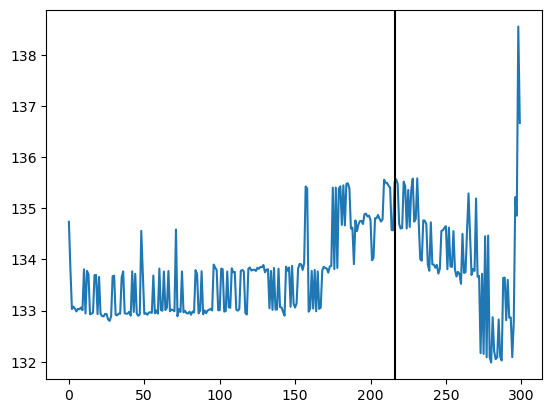

In [16]:
# p3 red bottom tail potential outlier point IDs:
# 145 18 174 290 272 252 242 231 216 234 264

point = 'p3'
plt.plot(reference_subtraced_coordinates_dict[f'{point}.x'][:300])
# plt.gca().vline(216)
plt.axvline(216, color='k', linestyle='solid')
plt.show()

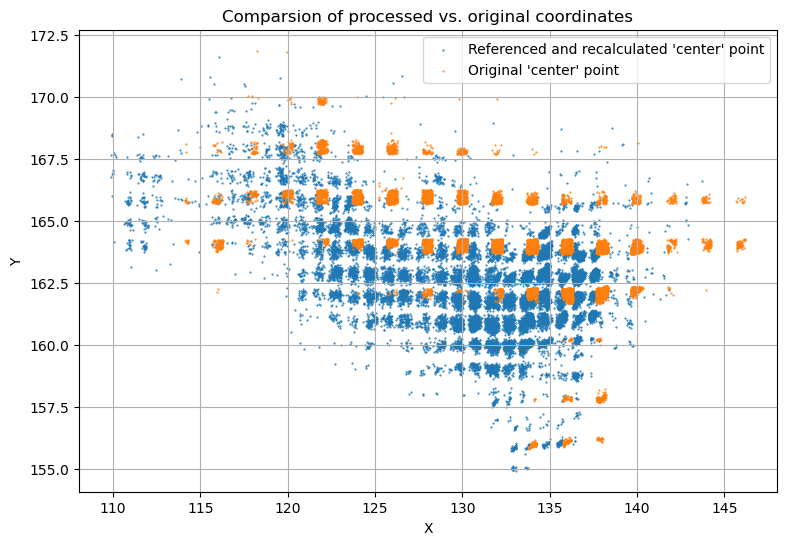

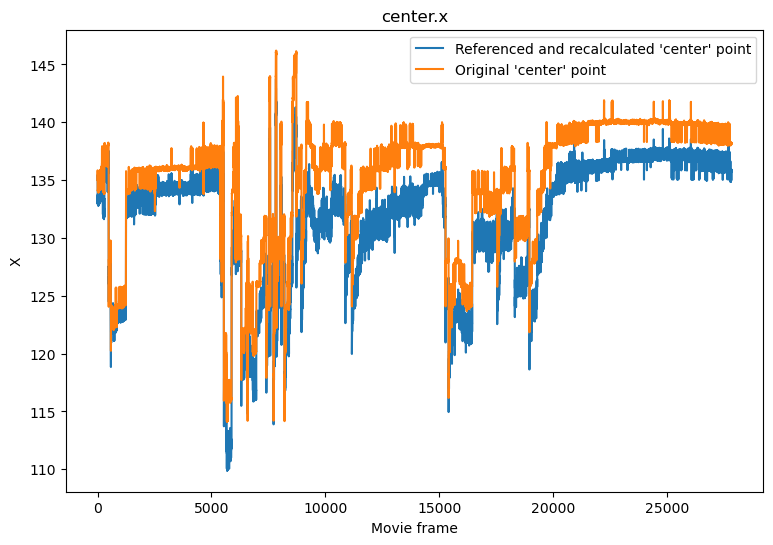

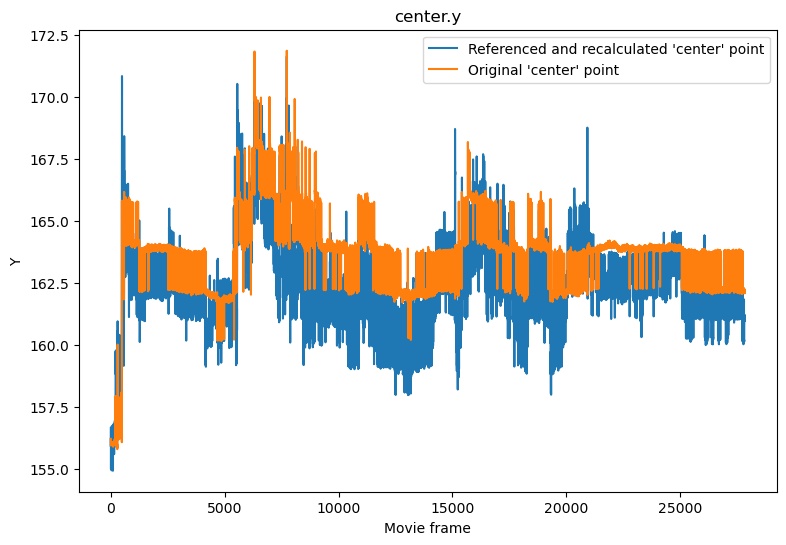

In [17]:
point = 'center'

plt.figure(figsize=(9,6))
plt.title('Comparsion of processed vs. original coordinates')
plt.scatter(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], s=0.25)
plt.scatter(df[f'{point}.x'], df[f'{point}.y'], s=0.25)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([f"Referenced and recalculated '{point}' point", f"Original '{point}' point"])
plt.grid()
plt.show()

plt.figure(figsize=(9,6))
plt.title(f'{point}.x')
plt.plot(reference_subtraced_coordinates_dict[f'{point}.x'])
plt.plot(df[f'{point}.x'])
plt.xlabel('Movie frame')
plt.ylabel('X')
plt.legend([f"Referenced and recalculated '{point}' point", f"Original '{point}' point"])
plt.show()

plt.figure(figsize=(9,6))
plt.title(f'{point}.y')
plt.plot(reference_subtraced_coordinates_dict[f'{point}.y'])
plt.plot(df[f'{point}.y'])
plt.xlabel('Movie frame')
plt.ylabel('Y')
plt.legend([f"Referenced and recalculated '{point}' point", f"Original '{point}' point"])
plt.show()

## Finding a horizontal axis

In [18]:
np.hstack([df[f'{point}.x'].to_numpy(), df[f'{point}.y'].to_numpy()])

array([135.01277982, 135.84332275, 134.16442871, ..., 162.20175171,
       162.16641235, 162.19085693])

In [19]:
point = 'center'

# line_fn = np.polyfit(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], 1)
line_fn = np.polyfit(np.hstack([df[f'left.x'].to_numpy(), df[f'center.x'].to_numpy()]), np.hstack([df[f'left.y'].to_numpy(), df[f'center.y'].to_numpy()]), 1)
line_fn = np.poly1d(line_fn)

In [20]:
print(f'Found a linear fit with slope {line_fn[1]} and y-intercept {line_fn[0]}')

Found a linear fit with slope -0.18097951651034308 and y-intercept 188.02761592042617


In [21]:
"{:.2f}".format(line_fn[1])

'-0.18'

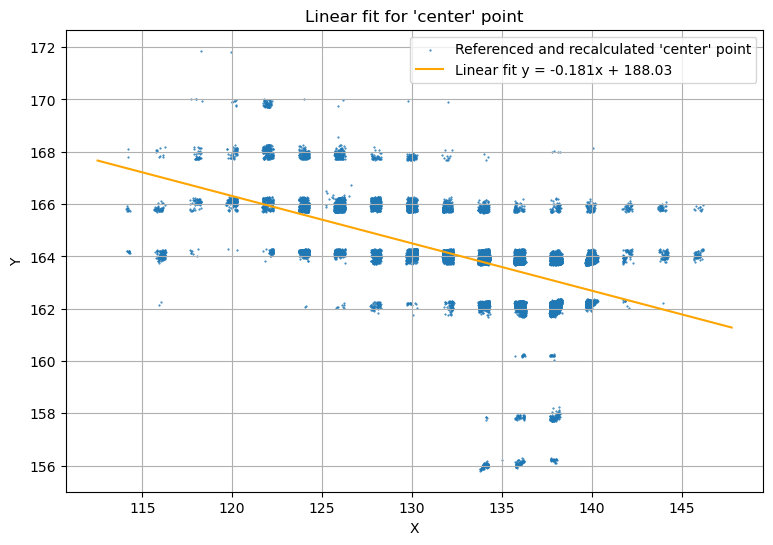

In [22]:
plt.figure(figsize=(9,6))
plt.title(f"Linear fit for '{point}' point")
# plt.scatter(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], s=0.25)
plt.scatter(df[f'{point}.x'], df[f'{point}.y'], s=0.25)

current_xlim, current_ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.plot(current_xlim, line_fn(current_xlim), c='orange')
# plt.xlim(current_xlim)
# plt.ylim(current_ylim)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend([f"Referenced and recalculated '{point}' point", f'Linear fit y = {"{:.3f}".format(line_fn[1])}x + {"{:.2f}".format(line_fn[0])}'])
plt.grid()
plt.show()

## Alignment

In [23]:
# point1 = np.array([0, line_fn(0)])
# m = line_fn[1]
# c = line_fn[0]
# point2 = np.array([-c/m, 0])
# vec = point2 - point1
# vec = vec / np.linalg.norm(vec)

# print(point1)
# print(point2)
# print(vec)

# test_arr = np.stack([reference_subtraced_displacements_dict[f'{point}.x'], reference_subtraced_displacements_dict[f'{point}.y']], axis=1)

In [24]:
points = np.stack([reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y']], axis=1)
points.shape

(27843, 2)

In [25]:
mean_center_coord = points.mean(axis=0)
centered_points = points.copy()
centered_points[:,0] = centered_points[:,0] - mean_center_coord[0]
centered_points[:,1] = centered_points[:,1] - mean_center_coord[1]

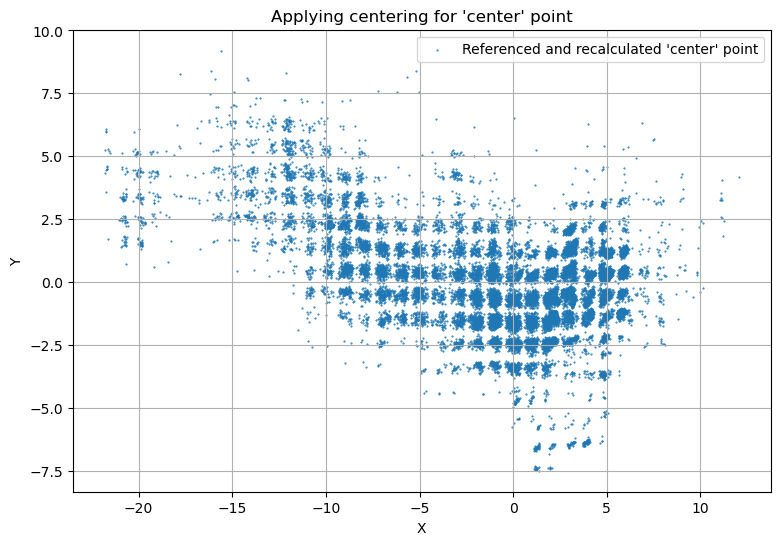

In [26]:
plt.figure(figsize=(9,6))
plt.title(f"Applying centering for '{point}' point")
plt.scatter(centered_points[:,0], centered_points[:,1], s=0.25)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([f"Referenced and recalculated '{point}' point", f"Rotated '{point}' point"])
plt.grid()
plt.show()

In [27]:
centered_points

array([[ 3.32153302, -6.21726802],
       [ 3.77231624, -6.52740646],
       [ 1.30094173, -5.79208541],
       ...,
       [ 4.07520225, -1.34568191],
       [ 4.12967995, -1.38311935],
       [ 4.13199356, -1.39279342]])

In [28]:
theta = np.arctan(line_fn[1])

def rotate_points(points, theta):
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    rotated_points = points.dot(rotation_matrix.T)
    return rotated_points

rotated_points = rotate_points(centered_points, -theta)
rotated_points.shape

(27843, 2)

In [29]:
theta

-0.17904155210527717

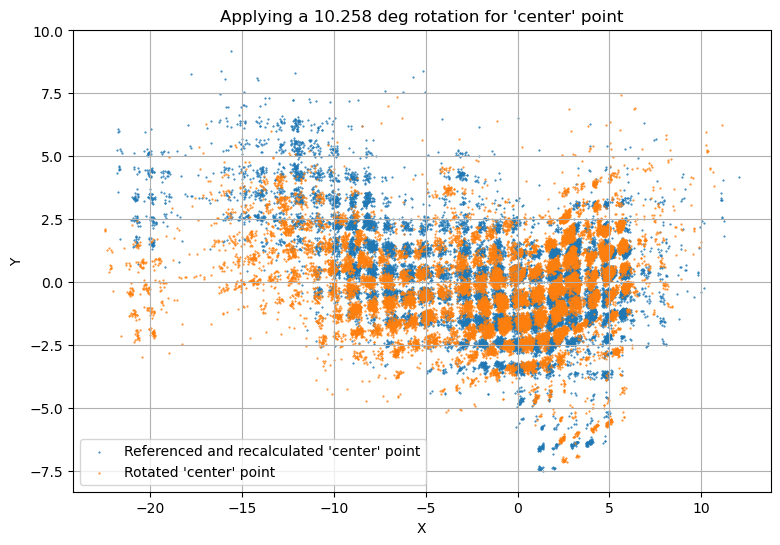

In [30]:
plt.figure(figsize=(9,6))
plt.title(f"Applying a {'{:.3f}'.format(abs(theta*(180/np.pi)))} deg rotation for '{point}' point")
plt.scatter(centered_points[:,0], centered_points[:,1], s=0.25)
plt.scatter(rotated_points[:,0], rotated_points[:,1], s=0.25)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([f"Referenced and recalculated '{point}' point", f"Rotated '{point}' point"])
plt.grid()
plt.show()

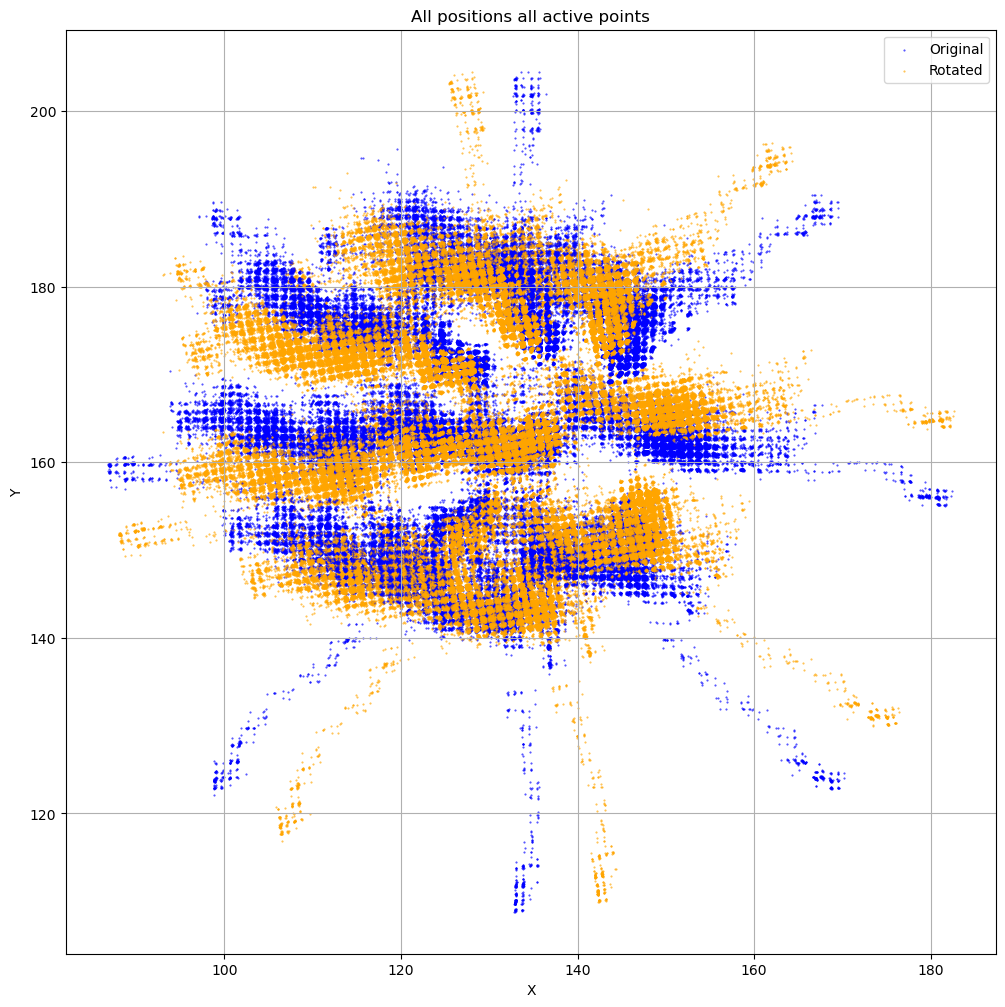

In [31]:
plt.figure(figsize=(12,12))
plt.title("All positions all active points")
for point in active_points:
    temp_points = np.stack([reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y']], axis=1) 
    temp_mean_center_coord = temp_points.mean(axis=0)
    centered_points = temp_points.copy()
    centered_points[:,0] = centered_points[:,0] - mean_center_coord[0]
    centered_points[:,1] = centered_points[:,1] - mean_center_coord[1]
    rotated_points = rotate_points(centered_points, -theta)
#     plt.scatter(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], s=0.25)
    plt.scatter(temp_points[:,0], temp_points[:,1], s=0.25, alpha=0.75, c='blue')
    plt.scatter(rotated_points[:,0] + mean_center_coord[0], rotated_points[:,1] + mean_center_coord[1], s=0.25, alpha=0.75, c='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Original', 'Rotated'])
plt.grid()
plt.show()

## Smoothing

In [32]:
def moving_avarage_smoothing(X,k):
    S = np.zeros(X.shape[0])
    for t in range(X.shape[0]):
        if t < k:
            S[t] = np.mean(X[:t+1])
        else:
            S[t] = np.sum(X[t-k:t])/k
    return S

def get_rotated_points(point_name, theta):
    temp_points = np.stack([reference_subtraced_coordinates_dict[f'{point_name}.x'], reference_subtraced_coordinates_dict[f'{point_name}.y']], axis=1)
    temp_mean_center_coord = temp_points.mean(axis=0)
    centered_points = temp_points.copy()
    centered_points[:,0] = centered_points[:,0] - mean_center_coord[0]
    centered_points[:,1] = centered_points[:,1] - mean_center_coord[1]
    rotated_points = rotate_points(centered_points, theta)
    rotated_points[:,0] = rotated_points[:,0] + mean_center_coord[0]
    rotated_points[:,1] = rotated_points[:,1] + mean_center_coord[1]
    return rotated_points

In [33]:
point = 'center'
rotated_points = get_rotated_points(point, -theta)

In [34]:
period = 1 / 207.76
t_coords = np.linspace(0, rotated_points.shape[0] * period, rotated_points.shape[0])
t_disps = np.linspace(0, rotated_points.shape[0] * period, rotated_points.shape[0]-1)

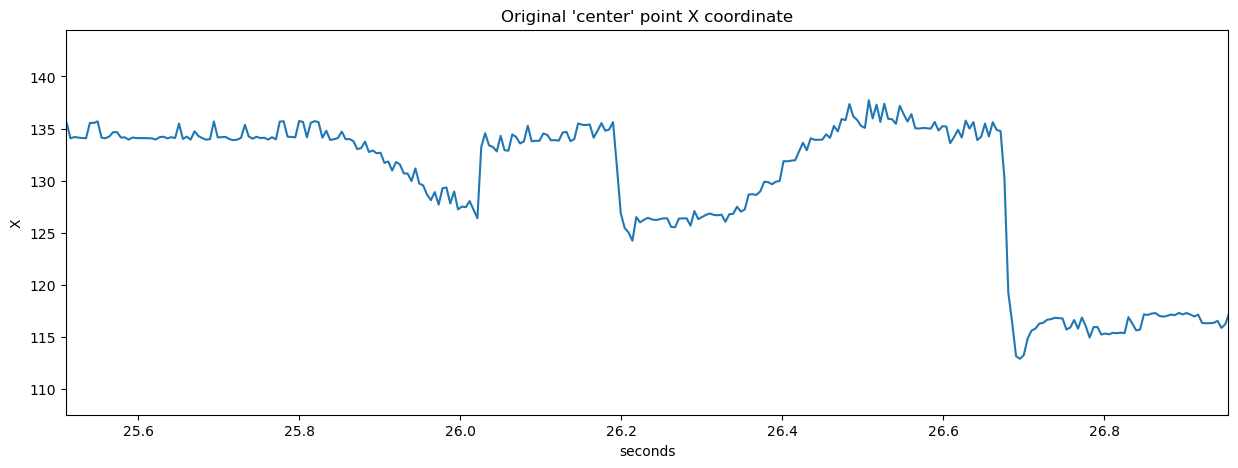

In [35]:
plt.figure(figsize=(15,5))
plt.title(f"Original '{point}' point X coordinate")
plt.plot(t_coords, rotated_points[:,0])
plt.xlim([5300 * period, 5600 * period])
plt.xlabel('seconds')
plt.ylabel('X')
plt.show()

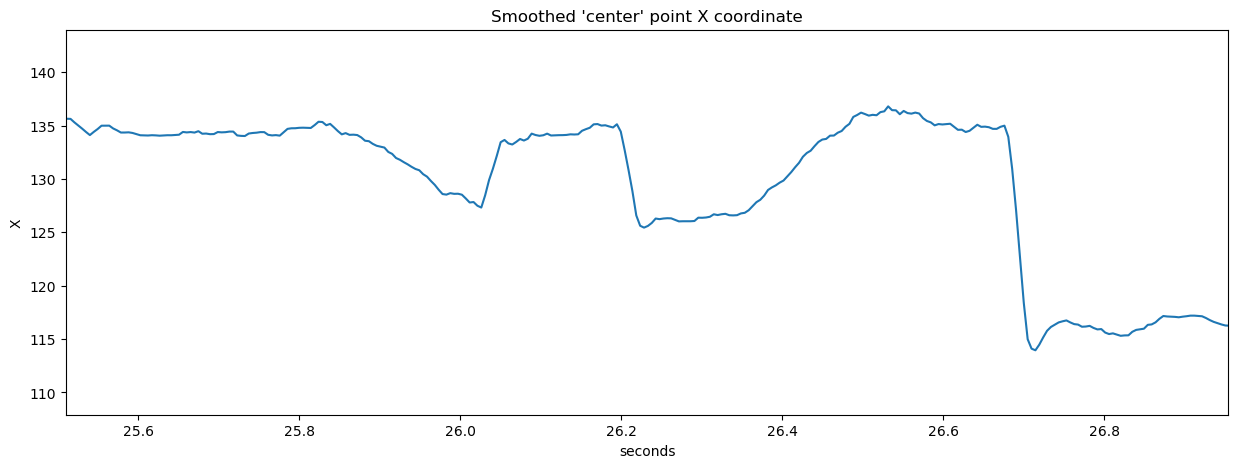

In [36]:
plt.figure(figsize=(15,5))
plt.title(f"Smoothed '{point}' point X coordinate")
plt.plot(t_coords, moving_avarage_smoothing(rotated_points[:,0], 5))
plt.xlim([5300 * period, 5600 * period])
plt.xlabel('seconds')
plt.ylabel('X')
plt.show()

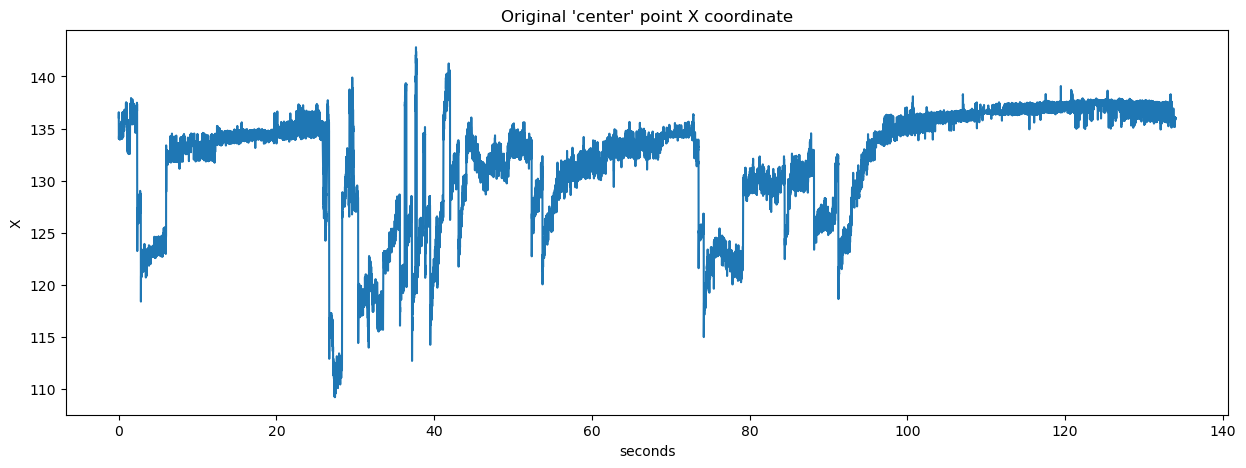

In [37]:
plt.figure(figsize=(15,5))
plt.title(f"Original '{point}' point X coordinate")
plt.plot(t_coords, rotated_points[:,0])
plt.xlabel('seconds')
plt.ylabel('X')
plt.show()

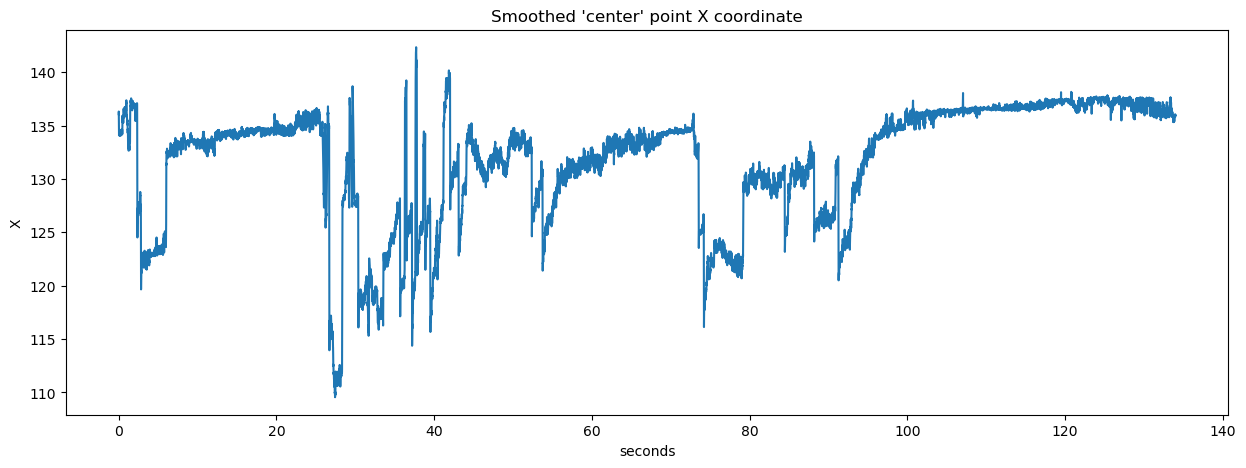

In [38]:
plt.figure(figsize=(15,5))
plt.title(f"Smoothed '{point}' point X coordinate")
plt.plot(t_coords, moving_avarage_smoothing(rotated_points[:,0], 5))
plt.xlabel('seconds')
plt.ylabel('X')
plt.show()

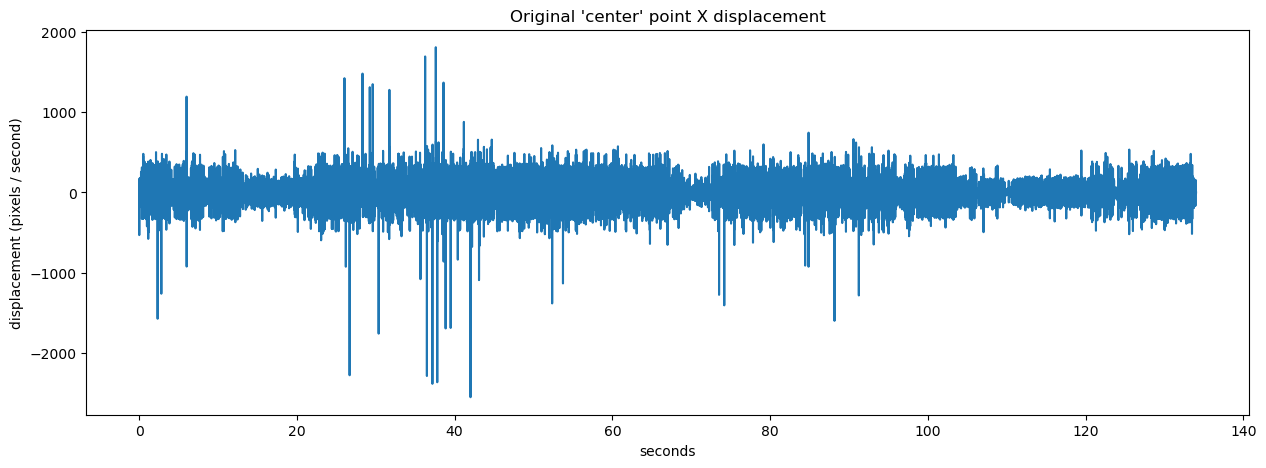

In [39]:
plt.figure(figsize=(15,5))
plt.title(f"Original '{point}' point X displacement")
plt.plot(t_disps, np.diff(rotated_points[:,0]) * (1/period))
plt.xlabel('seconds')
plt.ylabel('displacement (pixels / second)')
plt.show()

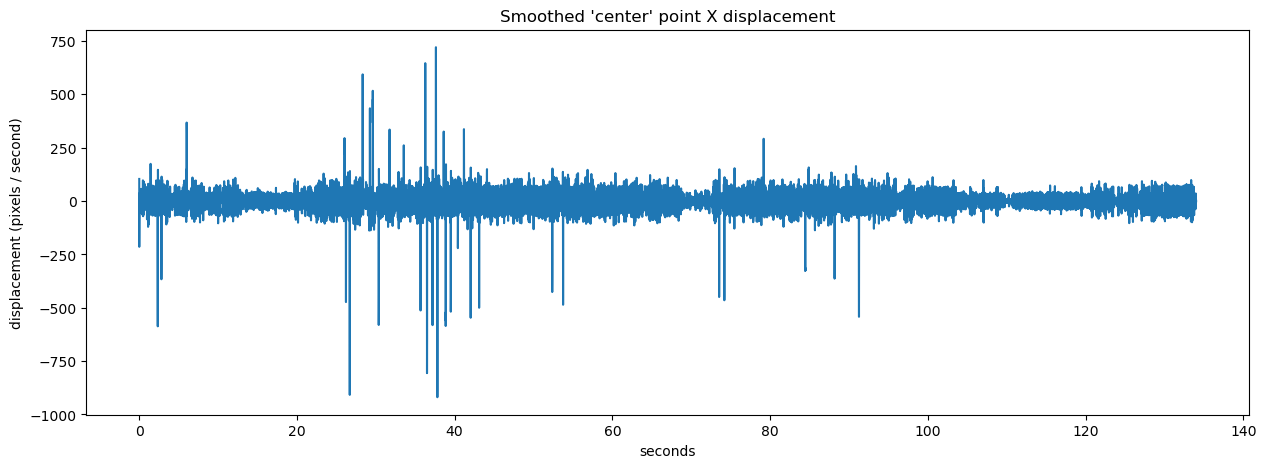

In [40]:
plt.figure(figsize=(15,5))
plt.title(f"Smoothed '{point}' point X displacement")
# plt.plot(moving_avarage_smoothing(rotated_points[:,0], 5))
plt.plot(t_disps, moving_avarage_smoothing(np.diff(rotated_points[:,0]) * (1/period), 5))
plt.xlabel('seconds')
plt.ylabel('displacement (pixels / second)')
plt.show()

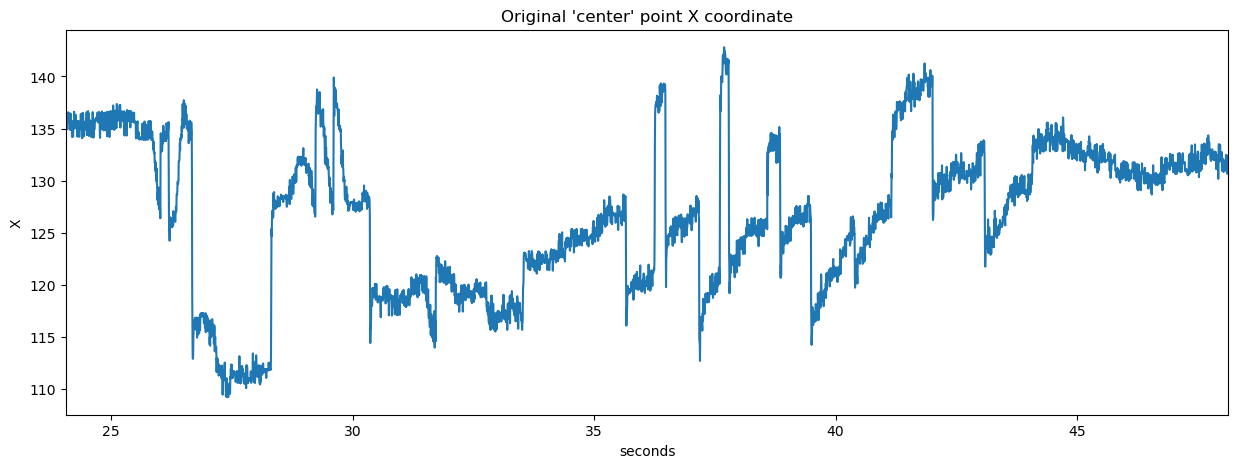

In [41]:
plt.figure(figsize=(15,5))
plt.title(f"Original '{point}' point X coordinate")
plt.plot(t_coords, rotated_points[:,0])
plt.xlim([5000 * period,10000 * period])
plt.xlabel('seconds')
plt.ylabel('X')
plt.show()

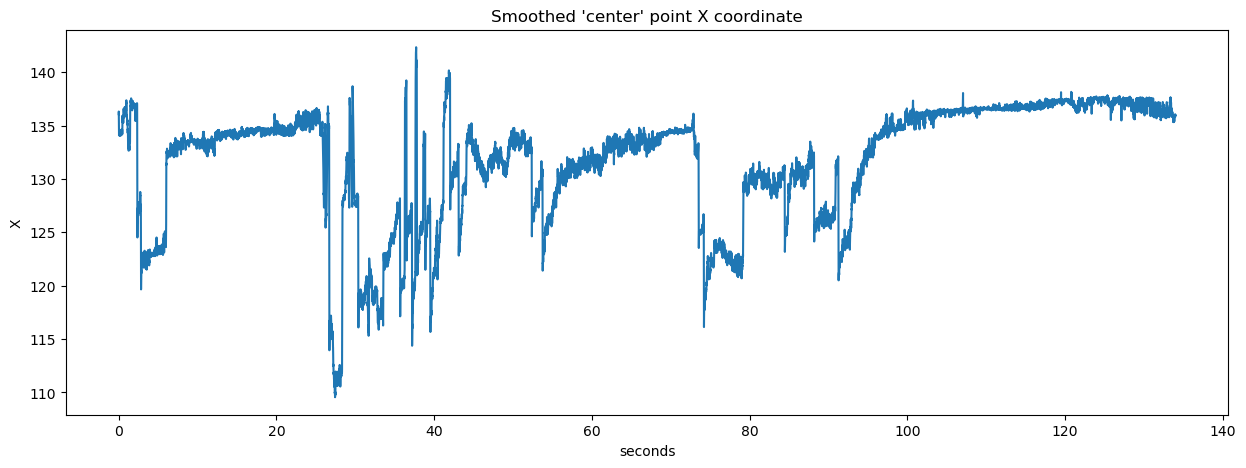

In [42]:
plt.figure(figsize=(15,5))
plt.title(f"Smoothed '{point}' point X coordinate")
plt.plot(t_coords, moving_avarage_smoothing(rotated_points[:,0], 5))
# plt.xlim([5000 * period,10000 * period])
plt.xlabel('seconds')
plt.ylabel('X')
plt.show()

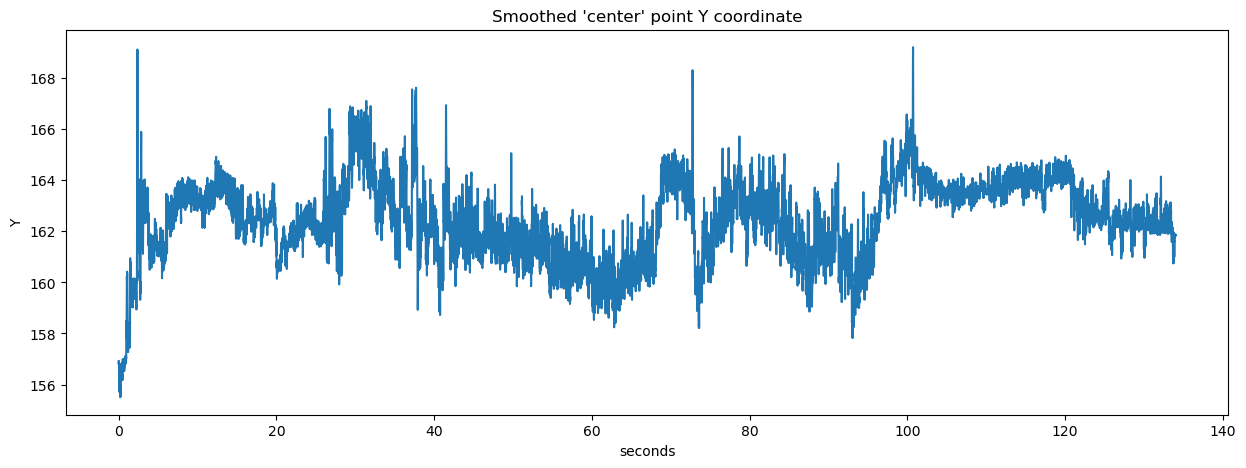

In [43]:
plt.figure(figsize=(15,5))
plt.title(f"Smoothed '{point}' point Y coordinate")
plt.plot(t_coords, moving_avarage_smoothing(rotated_points[:,1], 5))
# plt.xlim([5000 * period,10000 * period])
plt.xlabel('seconds')
plt.ylabel('Y')
plt.show()

## Saccade detection

In [44]:
# Prototype for detection code that uses a local STD-based threshold for a sliding window.

# window_size = 50
# std_multiplier_threshold = 3

# for i in range(window_size, rotated_points.shape[0]):
#     data_window = rotated_points[i-window_size:i, 0]
# #     inds = np.where(np.logical_or(data_window.any() > data_window.mean()+data_window.std()*std_multiplier_threshold, data_window.any() < data_window.mean()-data_window.std()*std_multiplier_threshold))
# #     inds = np.where(np.logical_or(data_window > data_window.mean()+data_window.std()*std_multiplier_threshold, data_window < data_window.mean()-data_window.std()*std_multiplier_threshold))
#     lower_threshold = data_window.mean()-data_window.std()*std_multiplier_threshold
#     upper_threshold = data_window.mean()+data_window.std()*std_multiplier_threshold
#     inds = np.where((data_window < lower_threshold) | (data_window > upper_threshold))[0]
#     inds = inds + (i-window_size)
#     print(inds)
# #     if data_window.any() > upper_threshold: print(3333)
# #     if data_window.any() < data_window.mean()-data_window.std()*std_multiplier_threshold:
# #         print(123)
# #     if data_window.any() > data_window.mean()+data_window.std()*std_multiplier_threshold or data_window.any() < data_window.mean()-data_window.std()*std_multiplier_threshold:
# #         print(123)

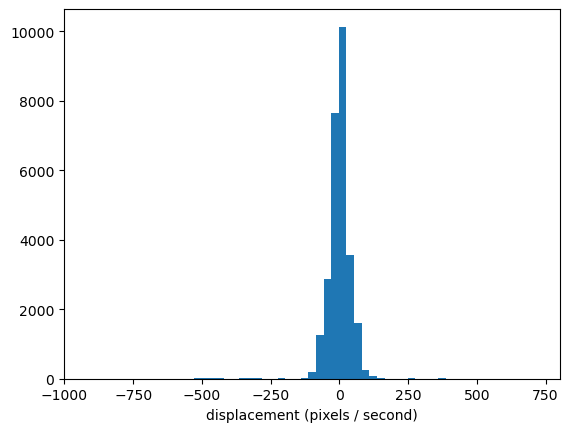

In [45]:
plt.hist(moving_avarage_smoothing(np.diff(rotated_points[:,0]) * (1/period), 5), bins=59)
plt.xlabel('displacement (pixels / second)')
plt.show()

In [46]:
point='center'

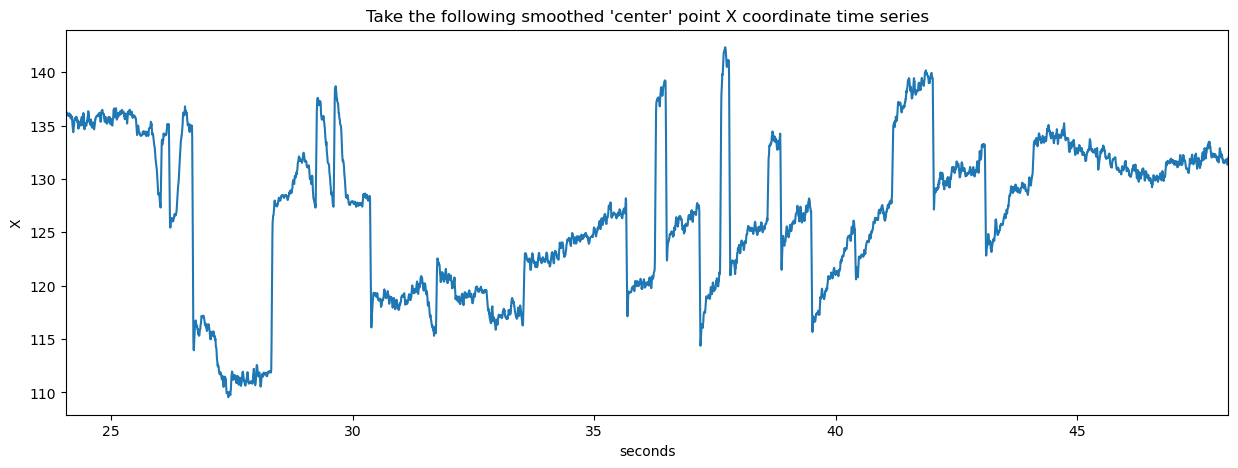

In [47]:
plt.figure(figsize=(15,5))
plt.title(f"Take the following smoothed '{point}' point X coordinate time series")
plt.plot(t_coords, moving_avarage_smoothing(rotated_points[:,0], 5))
plt.xlim([5000 * period,10000 * period])
plt.xlabel('seconds')
plt.ylabel('X')
plt.show()

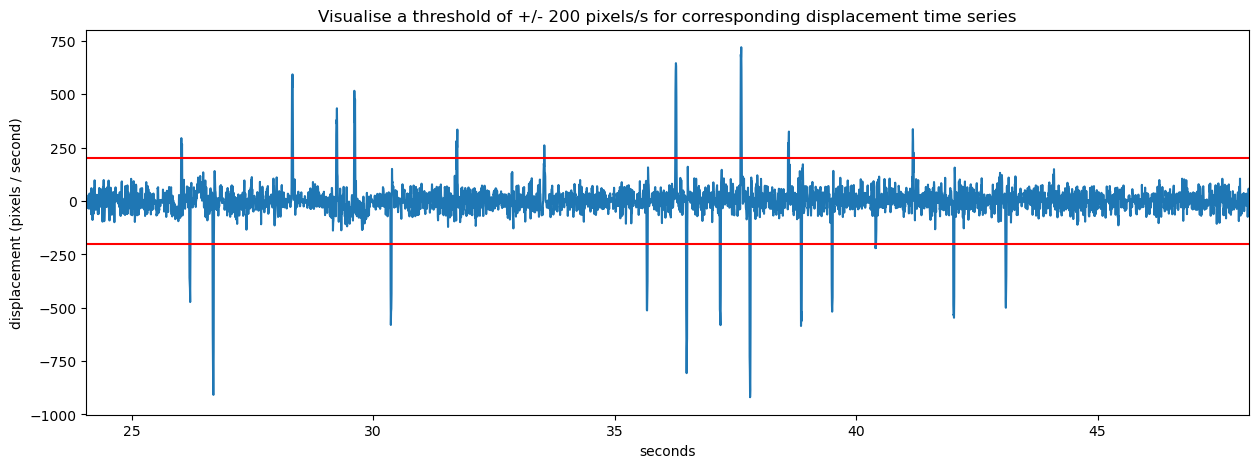

In [48]:
plt.figure(figsize=(15,5))
plt.title(f"Visualise a threshold of +/- 200 pixels/s for corresponding displacement time series")
plt.plot(t_disps, moving_avarage_smoothing(np.diff(rotated_points[:,0]) * (1/period), 5))
plt.xlim([5000 * period,10000 * period])
plt.xlabel('seconds')
plt.ylabel('displacement (pixels / second)')
plt.axhline(200, c='red')
plt.axhline(-200, c='red')
plt.show()

In [49]:
displacement_time_series = np.diff(rotated_points[:,0]) * (1/period)
smoothed_time_series = moving_avarage_smoothing(displacement_time_series, 5)

# threshold = 200
threshold = displacement_time_series.mean() + displacement_time_series.std() * 3

# detected_peaks_inds = np.where(np.abs(smoothed_time_series) > threshold)[0]
detected_peaks_inds = np.where(np.abs(displacement_time_series) > threshold)[0]
detected_peaks_inds.shape

(320,)

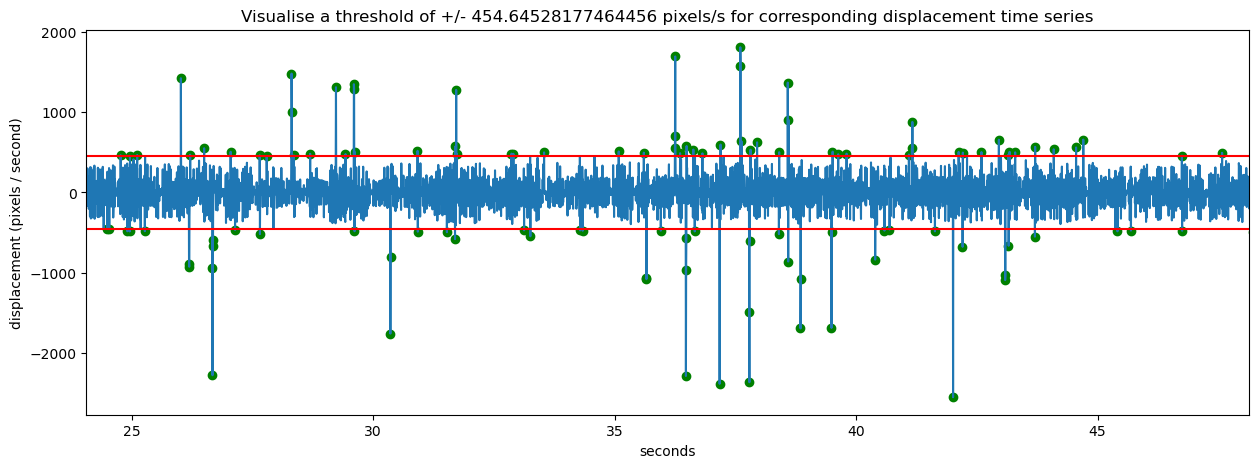

In [50]:
plt.figure(figsize=(15,5))
plt.title(f"Visualise a threshold of +/- {threshold} pixels/s for corresponding displacement time series")
# plt.plot(t_disps, smoothed_time_series)
plt.plot(t_disps, displacement_time_series)

# plt.scatter(detected_peaks_inds * period, smoothed_time_series[detected_peaks_inds], c='green')
plt.scatter(detected_peaks_inds * period, displacement_time_series[detected_peaks_inds], c='green')

plt.xlim([5000 * period,10000 * period])
plt.xlabel('seconds')
plt.ylabel('displacement (pixels / second)')
plt.axhline(threshold, c='red')
plt.axhline(-threshold, c='red')
plt.show()

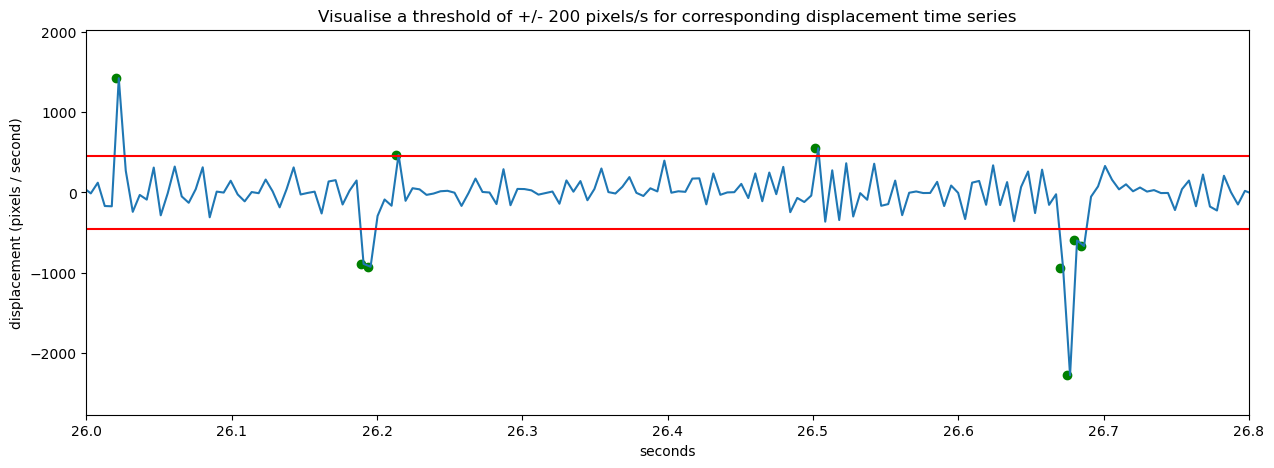

In [51]:
plt.figure(figsize=(15,5))
plt.title(f"Visualise a threshold of +/- 200 pixels/s for corresponding displacement time series")
# plt.plot(t_disps, smoothed_time_series)
plt.plot(t_disps, displacement_time_series)

# plt.scatter(detected_peaks_inds * period, smoothed_time_series[detected_peaks_inds], c='green')
plt.scatter(detected_peaks_inds * period, displacement_time_series[detected_peaks_inds], c='green')

plt.xlim([26,26.8])
plt.xlabel('seconds')
plt.ylabel('displacement (pixels / second)')
plt.axhline(threshold, c='red')
plt.axhline(-threshold, c='red')
plt.show()

In [52]:
def find_sequential_groups(arr):
    groups = []
    current_group = [arr[0]]
    
    for i in range(1, len(arr)):
        if arr[i] == arr[i-1] + 1:
            current_group.append(arr[i])
        else:
            groups.append(current_group)
            current_group = [arr[i]]
    groups.append(current_group)
    
    return groups

In [53]:
print(detected_peaks_inds)

[    1   107   231   237   240   442   484   485   515   581   582   599
   713   714  1247  1248  1249  1251  1427  1445  1456  1600  1601  2199
  2231  2232  2263  2528  4097  4178  4520  4711  4736  4737  4738  4775
  4792  4804  4826  4831  4833  4850  4873  4884  4886  5089  5098  5147
  5176  5186  5187  5218  5251  5406  5441  5442  5446  5506  5541  5542
  5543  5544  5620  5639  5745  5746  5775  5882  5883  5892  5962  6073
  6114  6150  6151  6153  6154  6307  6308  6424  6425  6550  6585  6586
  6590  6592  6828  6836  6882  6909  6968  7123  7134  7289  7397  7408
  7409  7470  7531  7532  7533  7553  7578  7579  7580  7581  7610  7616
  7649  7723  7727  7812  7813  7817  7850  7851  7853  7856  7884  7978
  7979  8016  8018  8019  8071  8072  8204  8205  8209  8233  8269  8392
  8432  8454  8537  8550  8552  8649  8727  8751  8768  8769  8849  8924
  8951  8952  8965  8966  8970  8994  9079  9080  9160  9256  9287  9434
  9492  9711  9712  9884 10016 10026 10070 10091 10

In [54]:
sequential_groups = find_sequential_groups(detected_peaks_inds)
print(sequential_groups)

[[1], [107], [231], [237], [240], [442], [484, 485], [515], [581, 582], [599], [713, 714], [1247, 1248, 1249], [1251], [1427], [1445], [1456], [1600, 1601], [2199], [2231, 2232], [2263], [2528], [4097], [4178], [4520], [4711], [4736, 4737, 4738], [4775], [4792], [4804], [4826], [4831], [4833], [4850], [4873], [4884], [4886], [5089], [5098], [5147], [5176], [5186, 5187], [5218], [5251], [5406], [5441, 5442], [5446], [5506], [5541, 5542, 5543, 5544], [5620], [5639], [5745, 5746], [5775], [5882, 5883], [5892], [5962], [6073], [6114], [6150, 6151], [6153, 6154], [6307, 6308], [6424, 6425], [6550], [6585, 6586], [6590], [6592], [6828], [6836], [6882], [6909], [6968], [7123], [7134], [7289], [7397], [7408, 7409], [7470], [7531, 7532, 7533], [7553], [7578, 7579, 7580, 7581], [7610], [7616], [7649], [7723], [7727], [7812, 7813], [7817], [7850, 7851], [7853], [7856], [7884], [7978, 7979], [8016], [8018, 8019], [8071, 8072], [8204, 8205], [8209], [8233], [8269], [8392], [8432], [8454], [8537], [

In [55]:
# prototyping max amplitude sample selection
print(sequential_groups[1])
print(displacement_time_series[sequential_groups[1]])
print(displacement_time_series[485:490])
max_amplitude_relative_ind = np.abs(displacement_time_series[sequential_groups[1]]).argmax()
print(max_amplitude_relative_ind)
max_amplitude_ind = sequential_groups[1][max_amplitude_relative_ind]
print(max_amplitude_ind)
max_amplitude_value = displacement_time_series[max_amplitude_ind]
print(max_amplitude_value)

[107]
[481.82080609]
[-774.00776311 -118.85995637 -205.29650145  387.70779198   56.15445622]
0
107
481.8208060926873


In [56]:
# Collecting max value deteceted saccades
# into a nested list = [[saccade_0_index, saccade_0_velocity_amplitude], [saccade_1_index, saccade_1_velocity_amplitude], ...]
detected_max_saccades = []

for group in find_sequential_groups(detected_peaks_inds):
    max_amplitude_relative_ind = np.abs(displacement_time_series[group]).argmax()
    max_amplitude_ind = group[max_amplitude_relative_ind]
    max_amplitude_value = displacement_time_series[max_amplitude_ind]
    detected_max_saccades.append([max_amplitude_ind, max_amplitude_value])

detected_max_saccades = np.array(detected_max_saccades)
print(detected_max_saccades.shape)
detected_max_saccades

(256, 2)


array([[ 1.00000000e+00, -5.32451472e+02],
       [ 1.07000000e+02,  4.81820806e+02],
       [ 2.31000000e+02, -4.81139901e+02],
       [ 2.37000000e+02, -5.79545095e+02],
       [ 2.40000000e+02, -5.00608936e+02],
       [ 4.42000000e+02,  5.03156147e+02],
       [ 4.84000000e+02, -1.57636089e+03],
       [ 5.15000000e+02, -4.74397241e+02],
       [ 5.82000000e+02, -1.26393167e+03],
       [ 5.99000000e+02,  4.82463178e+02],
       [ 7.14000000e+02,  4.72957708e+02],
       [ 1.24700000e+03,  1.19541874e+03],
       [ 1.25100000e+03,  5.12837761e+02],
       [ 1.42700000e+03,  4.90157767e+02],
       [ 1.44500000e+03,  4.74611983e+02],
       [ 1.45600000e+03,  4.76465801e+02],
       [ 1.60100000e+03,  4.70727165e+02],
       [ 2.19900000e+03, -4.84437021e+02],
       [ 2.23200000e+03,  5.15557825e+02],
       [ 2.26300000e+03,  4.78236999e+02],
       [ 2.52800000e+03,  5.28477591e+02],
       [ 4.09700000e+03,  4.72230635e+02],
       [ 4.17800000e+03, -4.93493414e+02],
       [ 4.

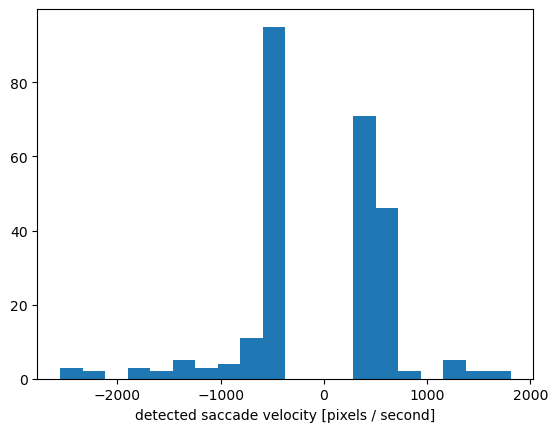

In [57]:
plt.hist(detected_max_saccades[:,1], bins=20)
plt.xlabel('detected saccade velocity [pixels / second]')
plt.show()

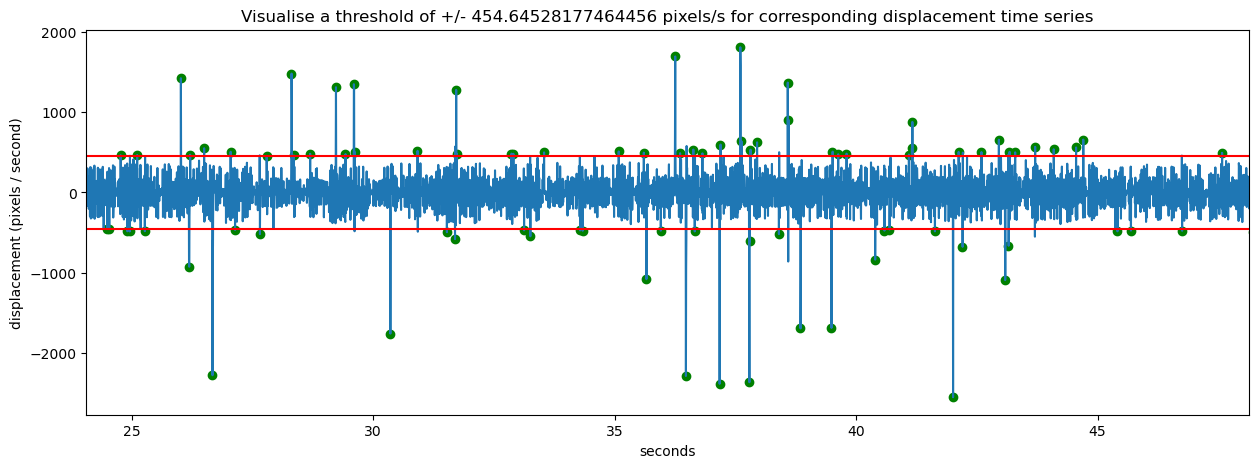

In [58]:
plt.figure(figsize=(15,5))
plt.title(f"Visualise a threshold of +/- {threshold} pixels/s for corresponding displacement time series")
plt.plot(t_disps, displacement_time_series)

plt.scatter(detected_max_saccades[:,0] * period, detected_max_saccades[:,1], c='green')

plt.xlim([5000 * period,10000 * period])
plt.xlabel('seconds')
plt.ylabel('displacement (pixels / second)')
plt.axhline(threshold, c='red')
plt.axhline(-threshold, c='red')
plt.show()

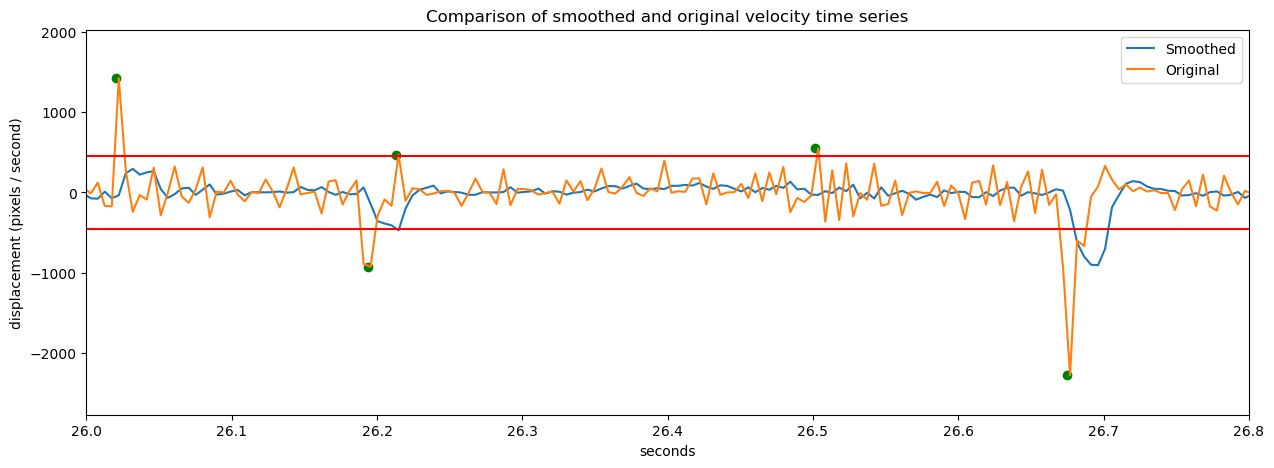

In [59]:
plt.figure(figsize=(15,5))
plt.title(f"Comparison of smoothed and original velocity time series")
plt.plot(t_disps, smoothed_time_series)
plt.plot(t_disps, displacement_time_series)

plt.scatter(detected_max_saccades[:,0] * period, detected_max_saccades[:,1], c='green')

plt.xlim([26,26.8])
plt.xlabel('seconds')
plt.ylabel('displacement (pixels / second)')
plt.axhline(threshold, c='red')
plt.axhline(-threshold, c='red')
plt.legend(['Smoothed', 'Original'])
plt.show()

In [60]:
# 1) smoothing
# 2) saccade detection and amplitude plot
# 3) ellipse fitting

## Ellipse fitting

In [61]:
pupil_points = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']

In [62]:
rotated_points = {point: get_rotated_points(point, -theta) for point in pupil_points}

In [63]:
def get_eight_points_at_time(data_dict, point_name_list, t):
    points_coord_data = []
    for point in point_name_list:
        points_coord_data.append(data_dict[point][t,:])
    return np.stack(points_coord_data, axis=0)
get_eight_points_at_time(rotated_points, pupil_points, 1000).shape

(8, 2)

In [64]:
rotated_points['p1'].shape

(27843, 2)

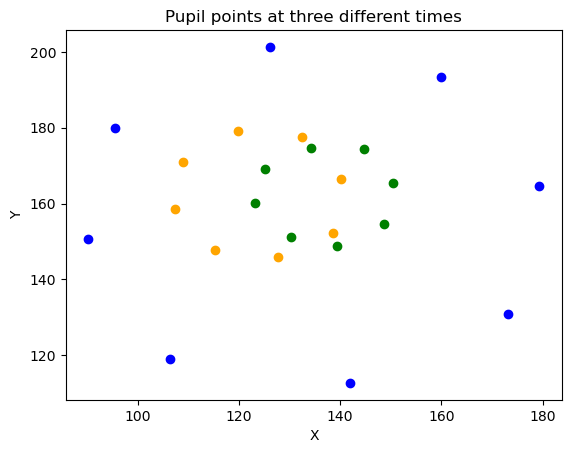

In [65]:
times = [100, 1000, 5000]
colors = ['blue', 'orange', 'green']

for i in range(3):
    for point, data in rotated_points.items():
        plt.scatter(data[times[i], 0], data[times[i], 1], c=colors[i])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pupil points at three different times')
plt.show()

In [66]:
from ellipse import LsqEllipse
# https://github.com/bdhammel/least-squares-ellipse-fitting

In [67]:
# Collecting parameters of the fitted ellipse into an array over the whole recording
# ellipse_parameters_data contents = (width, height, phi)
# ellipse_center_points_data = (center_x, center_y)
ellipse_parameters_data = []
ellipse_center_points_data = []
for t in range(rotated_points['p1'].shape[0]):
    reg = LsqEllipse().fit(get_eight_points_at_time(rotated_points, pupil_points, t))
    center, width, height, phi = reg.as_parameters()
    ellipse_parameters_data.append([width, height, phi])
    ellipse_center_points_data.append(center)
ellipse_parameters_data = np.array(ellipse_parameters_data)
ellipse_center_points_data = np.array(ellipse_center_points_data)

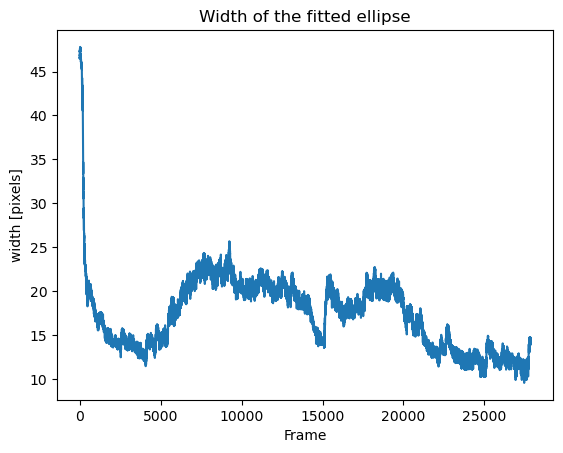

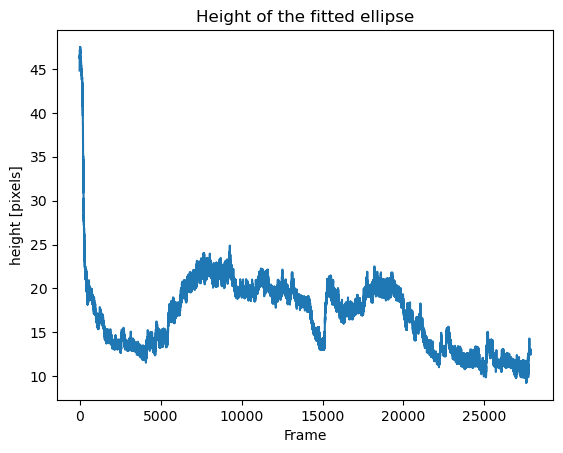

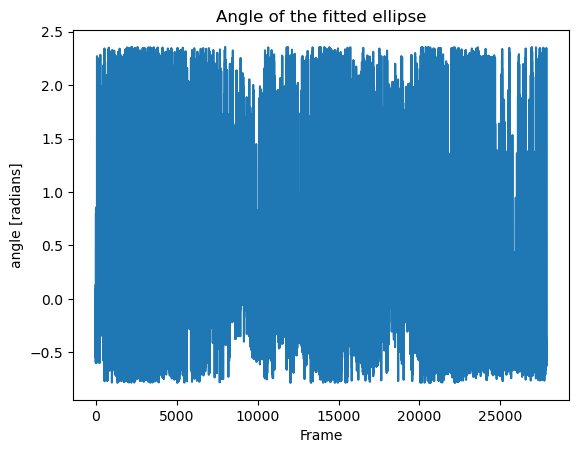

In [68]:
plt.title('Width of the fitted ellipse')
plt.plot(ellipse_parameters_data[:, 0])
plt.xlabel('Frame')
plt.ylabel('width [pixels]')
plt.show()

plt.title('Height of the fitted ellipse')
plt.plot(ellipse_parameters_data[:, 1])
plt.xlabel('Frame')
plt.ylabel('height [pixels]')
plt.show()

plt.title('Angle of the fitted ellipse')
plt.plot(ellipse_parameters_data[:, 2])
plt.xlabel('Frame')
plt.ylabel('angle [radians]')
plt.show()

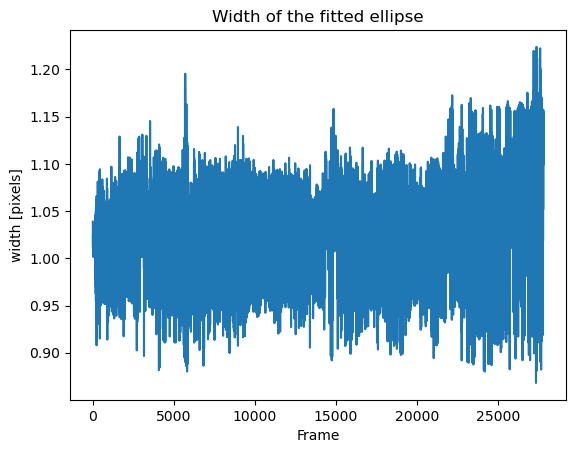

In [69]:
plt.title('Width of the fitted ellipse')
plt.plot(ellipse_parameters_data[:, 0] / ellipse_parameters_data[:, 1])
plt.xlabel('Frame')
plt.ylabel('width [pixels]')
plt.show()

In [70]:
help(LsqEllipse)

Help on class LsqEllipse in module ellipse:

class LsqEllipse(builtins.object)
 |  Lest Squares fitting of Elliptical data
 |  
 |  Attributes
 |  ----------
 |  coef_ : array
 |      Estimated coefficients for the Least squares fit to the elliptical data
 |      containing the values [a,b,c,d,f,g].T corresponding to Eqn 1 (*)
 |      ax**2 + bxy + cy**2 + dx + ey + f
 |  
 |  References
 |  ----------
 |  (*) Halir R., Flusser J. 'Numerically Stable Direct Least Squares
 |  Fitting of Ellipses'
 |  (**) Weisstein, Eric W. "Ellipse." From MathWorld--A Wolfram Web Resource.
 |  http://mathworld.wolfram.com/Ellipse.html
 |  (***) https://mathworld.wolfram.com/InverseCotangent.html
 |  
 |  Examples
 |  --------
 |  >>> import numpy as np
 |  >>> from ellipse import LsqEllipse
 |  >>> x = np.array([ 1.,  0., -1., -0.,  1.])
 |  >>> y = np.array([ 0. ,  0.5,  0. , -0.5, -0. ])
 |  >>> X = np.c_[x, y]
 |  >>> el = LsqEllipse().fit(X)
 |  >>> center, width, height, phi = el.as_parameters()
 